### 1. selenium을 이용한 페이스북 크롤링

초기설정

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd

크롬 접속시 환경 설정에 관해서 물어보는 창을 무시함

In [6]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(chrome_options=chrome_options)

facebook 접속

In [7]:
driver.get("https://www.facebook.com")
time.sleep(3)

id와 pw를 입력하고 로그인 버튼을 클릭

In [8]:
driver.find_element_by_css_selector("#email").send_keys('id')
driver.find_element_by_css_selector("#pass").send_keys('pw')
driver.find_element_by_css_selector("#loginbutton").click()
time.sleep(3)

크롤링하고 싶은 페이지로 이동

In [9]:
driver.get("https://www.facebook.com/huffpost")
time.sleep(3)

크롤링할 페이지

![huff](material/huffpost.png)

2005년 5월 아리아나 허핑턴이 설립한 미국의 리버럴, 신좌파성향 인터넷 신문이다. 

설립 당시의 이름은 허핑턴포스트(The Huffington Post) 였으며 2017년에 애칭이었던 허프포스트(Huffpost)로 개칭했다.

페이지 관리자와 채팅 할 수 있는 조그만 창이 밑에 뜨는데 그것을 꺼지게 함

In [10]:
if driver.find_elements_by_css_selector("._32ca"):
    while True:
        try:
            driver.find_element_by_css_selector("._32ca").click()
            break
        except:
            time.sleep(3)

페이지 내의 게시물 탭으로 이동

In [11]:
driver.find_element_by_css_selector("#entity_sidebar > div:nth-child(3) > div:nth-child(5) > a > span._2yav").click()

페이스북 html 구조

In [12]:
first_string = "._1xnd ._4-u2._4-u8 ._4-u2._4-u8" # 게시물 페이지에 들어갔을때 처음으로 나오는 속성
date = "._5pcq abbr" # 게시물이 올라온 날짜
content = ".userContent p" # 게시물의 내용
comment = "._ipn.clearfix._-5d ._ipo a" # 게시물의 댓글 및 공유
emotion = "._ipp > ._3t53 > span > a" # 게시물의 리액션 (좋아요, 등등)
add_string = "._1xnd " # add_string 문자열을 first_string과 더해주면 하위 속성으로 들어갈 수 있음
num = 1
ls = []

![facebookimg](facebookhtml.png)

In [13]:
today = 2018117 # 크롤링을 몇일까지 할 것인지를 정해줌
while True:
    posts = driver.find_elements_by_css_selector(first_string)
    for post in posts:
        # for문을 돌리면서 속성들을 비교하고, 없다면 null값을 넣어줌
        ls.append(num)
        ls.append(post.find_element_by_css_selector(date).get_attribute("title"))
        try:
            ls.append(post.find_element_by_css_selector(content).text)
        except:
            ls.append("NULL")
        try:
            ls.append(post.find_elements_by_css_selector(comment)[0].text)
        except:
            ls.append("NULL")
        try:
            ls.append(post.find_elements_by_css_selector(comment)[1].text)
        except:
            ls.append("NULL")
        try:
            ls.append(post.find_elements_by_css_selector(emotion)[0].get_attribute("aria-label"))
        except:
            ls.append("NULL")
        try:
            ls.append(post.find_elements_by_css_selector(emotion)[1].get_attribute("aria-label"))
        except:
            ls.append("NULL")
        try:
            ls.append(post.find_elements_by_css_selector(emotion)[2].get_attribute("aria-label"))
        except:
            ls.append("NULL")
        num += 1
    #for문을 사용해 한 페이지의 게시물 내용, 댓글갯수, 공유수 등을 리스트에 추가함
    
    first_string = add_string + first_string
    # 첫 페이지에서 while문이 break가 걸릴때까지 안의 속성으로 들어갈 수 있도록 만들어 줌
    
    try:
        driver.find_element_by_css_selector("#www_pages_reaction_see_more_unitwww_pages_posts").click() #스크롤을 내림
        time.sleep(5)
    except:
        pass
    
    if int(ls[-7][:9].replace("-","")) < today:
        break #날짜 속성을 숫자로 바꾸고, 크롤링을 시작하고 싶은 날짜보다 작다면 break

while 문에서는 8개 단위로 크롤링을 하고 append 해주기 때문에 크롤링을 시작하고 싶은 날짜를 포함하고 있는 8개의 게시물이 모두 출력된다.

이를 걸러주기 위해 리스트 내의 날짜 속성을 비교해 크롤링을 시작하고 싶은 날짜의 게시물을 걸러준다.

In [14]:
for i in range(int(len(ls)/8)):
    if int(ls[1 + 8*i][:9].replace("-","")) < today:
        ls_today = ls[:8*i]
        break # 멈춘 페이지에서 크롤링 하고 싶은 날

리스트 출력

In [15]:
ls_today[-16:]

[158,
 '2018-11-7 오전 12:33',
 '"I thought you would have more important things to do... before an election — like sucking up to the guy who called your wife ugly and accused your dad of murder."',
 '댓글 289개',
 '공유 895회',
 '좋아요 3.6천개',
 '웃겨요 2.6천개',
 '최고예요 319개',
 159,
 '2018-11-7 오전 12:00',
 'Trademarks hold the promise of profit for the senior White House adviser and daughter of the president.',
 '댓글 1.3천개',
 '공유 6,762회',
 '화나요 8.9천개',
 '멋져요 1.5천개',
 '좋아요 814개']

### 2. 데이터 프레임 생성 

리액션별로 컬럼을 만들고, 리스트에서 속성을 뽑아내서 넣어준다

In [16]:
df = pd.DataFrame(columns=["날짜", "내용", "댓글", "공유", "좋아요", "화나요", "웃겨요", "멋져요", "슬퍼요", "최고예요"])

In [17]:
for i in range(int(len(ls_today)/8)):
    if ls_today[5 + i*8] == "NULL":
        dic = {
                    "날짜": ls_today[1 + i*8],
                    "내용": ls_today[2 + i*8],
                    "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                    "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                }
    elif ls_today[6 + i*8] == "NULL":
        dic = {
                    "날짜": ls_today[1 + i*8],
                    "내용": ls_today[2 + i*8],
                    "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                    "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                    ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                }
    elif ls_today[7 + i*8] == "NULL":
        dic = {
                    "날짜": ls_today[1 + i*8],
                    "내용": ls_today[2 + i*8],
                    "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                    "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                    ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                    ls_today[6 + i*8].split(" ")[0]: ls_today[6 + i*8].split(" ")[1][:-1],
                }
    else:
        dic = {
                    "날짜": ls_today[1 + i*8],
                    "내용": ls_today[2 + i*8],
                    "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                    "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                    ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                    ls_today[6 + i*8].split(" ")[0]: ls_today[6 + i*8].split(" ")[1][:-1],
                    ls_today[7 + i*8].split(" ")[0]: ls_today[7 + i*8].split(" ")[1][:-1],

                }
    df = df.append(dic, ignore_index=True)

In [18]:
df

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
0,2018-11-9 오전 01:15,The senator once said firing Jeff Sessions wou...,51,22,21,24,32,NaN,NaN,NaN
1,2018-11-9 오전 01:01,"Matt Wennerstrom, 20, said he threw barstools ...",21,37,63,NaN,NaN,13,135,NaN
2,2018-11-9 오전 12:45,Despite hopes for a truce between the presiden...,248,49,77,270,43,NaN,NaN,NaN
3,2018-11-9 오전 12:30,Don Lemon says Donald Trump's off-the-rails pr...,154,104,817,NaN,75,NaN,NaN,57
4,2018-11-9 오전 12:15,12 people were killed after a gunman opened fi...,95,112,39,76,NaN,NaN,222,NaN
5,2018-11-9 오전 12:00,A heartbreaking account of the mass shooting a...,101,198,175,180,NaN,NaN,1.8천,NaN
6,2018-11-8 오후 11:30,Ginsburg was admitted to George Washington Uni...,348,421,98,NaN,NaN,230,1.6천,NaN
7,2018-11-8 오후 11:00,This is one rat that won't be bullied by a cat.,29,83,81,NaN,163,21,NaN,NaN
8,2018-11-8 오후 10:30,Another Trump promise broken.,403,940,918,658,289,NaN,NaN,NaN
9,2018-11-8 오후 10:00,"Lindsey Graham once promised ""holy hell to pay...",1.2천,"2,944",3.7천,1.2천,2.3천,NaN,NaN,NaN


In [19]:
df.tail()

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
154,2018-11-7 오전 02:15,Here’s how the late-night comedians covered th...,19,18,104,NaN,20,NaN,NaN,9
155,2018-11-7 오전 01:30,After bragging that America was “winning at ev...,622,160,509,257,1천,NaN,NaN,NaN
156,2018-11-7 오전 01:02,"""This is absolutely Dave Chappelle, the comedi...",32,92,1.6천,NaN,27,NaN,NaN,210
157,2018-11-7 오전 12:33,"""I thought you would have more important thing...",289,895,3.6천,NaN,2.6천,NaN,NaN,319
158,2018-11-7 오전 12:00,Trademarks hold the promise of profit for the ...,1.3천,"6,762",814,8.9천,NaN,1.5천,NaN,NaN


Null 값 처리

In [20]:
df = df.fillna(0)
df = df.astype(str)

In [21]:
df.tail()

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
154,2018-11-7 오전 02:15,Here’s how the late-night comedians covered th...,19,18,104,0,20,0,0,9
155,2018-11-7 오전 01:30,After bragging that America was “winning at ev...,622,160,509,257,1천,0,0,0
156,2018-11-7 오전 01:02,"""This is absolutely Dave Chappelle, the comedi...",32,92,1.6천,0,27,0,0,210
157,2018-11-7 오전 12:33,"""I thought you would have more important thing...",289,895,3.6천,0,2.6천,0,0,319
158,2018-11-7 오전 12:00,Trademarks hold the promise of profit for the ...,1.3천,"6,762",814,8.9천,0,1.5천,0,0


7천을 7000으로, 1,599를 1599로 수정해서 비교하기 쉽게 만든다

In [22]:
for column in list(df.columns[2:]):
    for i in range(len(df)):
        if df[column][i][-1] == "천":
            df[column][i] = float(df[column][i][:-1]) * 1000
        elif df[column][i][-1] == "만":
            df[column][i] = float(df[column][i][:-1]) * 10000
    
df.공유 = df.공유.apply(lambda x: x.replace(",",""))

In [23]:
df.tail()

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
154,2018-11-7 오전 02:15,Here’s how the late-night comedians covered th...,19,18,104,0,20,0,0,9
155,2018-11-7 오전 01:30,After bragging that America was “winning at ev...,622,160,509,257,1000,0,0,0
156,2018-11-7 오전 01:02,"""This is absolutely Dave Chappelle, the comedi...",32,92,1600,0,27,0,0,210
157,2018-11-7 오전 12:33,"""I thought you would have more important thing...",289,895,3600,0,2600,0,0,319
158,2018-11-7 오전 12:00,Trademarks hold the promise of profit for the ...,1300,6762,814,8900,0,1500,0,0


In [24]:
df

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
0,2018-11-9 오전 01:15,The senator once said firing Jeff Sessions wou...,51,22,21,24,32,0,0,0
1,2018-11-9 오전 01:01,"Matt Wennerstrom, 20, said he threw barstools ...",21,37,63,0,0,13,135,0
2,2018-11-9 오전 12:45,Despite hopes for a truce between the presiden...,248,49,77,270,43,0,0,0
3,2018-11-9 오전 12:30,Don Lemon says Donald Trump's off-the-rails pr...,154,104,817,0,75,0,0,57
4,2018-11-9 오전 12:15,12 people were killed after a gunman opened fi...,95,112,39,76,0,0,222,0
5,2018-11-9 오전 12:00,A heartbreaking account of the mass shooting a...,101,198,175,180,0,0,1800,0
6,2018-11-8 오후 11:30,Ginsburg was admitted to George Washington Uni...,348,421,98,0,0,230,1600,0
7,2018-11-8 오후 11:00,This is one rat that won't be bullied by a cat.,29,83,81,0,163,21,0,0
8,2018-11-8 오후 10:30,Another Trump promise broken.,403,940,918,658,289,0,0,0
9,2018-11-8 오후 10:00,"Lindsey Graham once promised ""holy hell to pay...",1200,2944,3700,1200,2300,0,0,0


### 3. 함수 생성

In [25]:
def page_crawling(id, pw, page_url="https://www.facebook.com/huffpost", today="2018117"):
    
    # chorme 옵션, facebook을 들어갈 때 페이스북에서 알람을 보내는 것을 허용하겠냐는 chrome 알람이 뜨는데 
    # 이 알람은 alter로 처리할 수 있는 알람과는 다른 종류의 알람이므로 chromeoptions를 통해 알람이
    # 뜨지 않도록 한다.
    chrome_options = webdriver.ChromeOptions()
    prefs = {"profile.default_content_setting_values.notifications" : 2}
    chrome_options.add_experimental_option("prefs",prefs)
    driver = webdriver.Chrome(chrome_options=chrome_options)
    
    # facebook 접속
    driver.get("https://www.facebook.com")
    time.sleep(3)

    # id와 pw를 입력하고 로그인 버튼을 누름
    driver.find_element_by_css_selector("#email").send_keys(id)
    driver.find_element_by_css_selector("#pass").send_keys(pw)
    driver.find_element_by_css_selector("#loginbutton").click()
    time.sleep(3)
    
    # 크롤링하고 싶은 페이지로 이동
    driver.get(page_url)
    time.sleep(3)
    
    # 페이지 관리자와 채팅 할 수 있는 조그만 창이 밑에 뜨는데 그것을 꺼지게 함
    if driver.find_elements_by_css_selector("._32ca"):
        while True:
            try:
                driver.find_element_by_css_selector("._32ca").click()
                break
            except:
                time.sleep(3)
                
    # 페이지 내의 게시물 탭으로 이동
    driver.find_element_by_css_selector("#entity_sidebar > div:nth-child(3) > div:nth-child(5) > a > span._2yav").click()    
    time.sleep(2)
    
    first_string = "._1xnd ._4-u2._4-u8 ._4-u2._4-u8"
    date = "._5pcq abbr"
    content = ".userContent p"
    comment = "._ipn.clearfix._-5d ._ipo a"
    emotion = "._ipp > ._3t53 > span > a"
    add_string = "._1xnd "
    num = 1
    ls = []  
    
    # 게시물별로 접근
    while True:
        posts = driver.find_elements_by_css_selector(first_string)
        for post in posts:
            ls.append(num)
            ls.append(post.find_element_by_css_selector(date).get_attribute("title"))
            try:
                ls.append(post.find_element_by_css_selector(content).text)
            except:
                ls.append("NULL")
            try:
                ls.append(post.find_elements_by_css_selector(comment)[0].text)
            except:
                ls.append("NULL")
            try:
                ls.append(post.find_elements_by_css_selector(comment)[1].text)
            except:
                ls.append("NULL")
            try:
                ls.append(post.find_elements_by_css_selector(emotion)[0].get_attribute("aria-label"))
            except:
                ls.append("NULL")
            try:
                ls.append(post.find_elements_by_css_selector(emotion)[1].get_attribute("aria-label"))
            except:
                ls.append("NULL")
            try:
                ls.append(post.find_elements_by_css_selector(emotion)[2].get_attribute("aria-label"))
            except:
                ls.append("NULL")
            num += 1

        first_string = add_string + first_string

        try:
            driver.find_element_by_css_selector("#www_pages_reaction_see_more_unitwww_pages_posts").click()
            time.sleep(5)
        except:
            pass

        if int(ls[-7][:9].replace("-","")) < int(today):
            break
    
    
    for i in range(int(len(ls)/8)):
        if int(ls[1 + 8*i][:9].replace("-","")) < int(today):
            ls_today = ls[:8*i]
            break
            
    driver.quit()
    
    
    # 데이터프레임 생성
    df = pd.DataFrame(columns=["날짜", "내용", "댓글", "공유", "좋아요", "화나요", "웃겨요", "멋져요", "슬퍼요", "최고예요"])
    
    for i in range(int(len(ls_today)/8)):
        if ls_today[5 + i*8] == "NULL":
            dic = {
                        "날짜": ls_today[1 + i*8],
                        "내용": ls_today[2 + i*8],
                        "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                        "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                    }
        elif ls_today[6 + i*8] == "NULL":
            dic = {
                        "날짜": ls_today[1 + i*8],
                        "내용": ls_today[2 + i*8],
                        "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                        "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                        ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                    }
        elif ls_today[7 + i*8] == "NULL":
            dic = {
                        "날짜": ls_today[1 + i*8],
                        "내용": ls_today[2 + i*8],
                        "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                        "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                        ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                        ls_today[6 + i*8].split(" ")[0]: ls_today[6 + i*8].split(" ")[1][:-1],
                    }
        else:
            dic = {
                        "날짜": ls_today[1 + i*8],
                        "내용": ls_today[2 + i*8],
                        "댓글": ls_today[3 + i*8].split(" ")[1][:-1],
                        "공유": ls_today[4 + i*8].split(" ")[1][:-1],
                        ls_today[5 + i*8].split(" ")[0]: ls_today[5 + i*8].split(" ")[1][:-1],
                        ls_today[6 + i*8].split(" ")[0]: ls_today[6 + i*8].split(" ")[1][:-1],
                        ls_today[7 + i*8].split(" ")[0]: ls_today[7 + i*8].split(" ")[1][:-1],
                    }
            
        df = df.append(dic, ignore_index=True)
       
    # NULL값 처리
    df = df.fillna(0)
    df = df.astype(str)

    # 개수가 천이 넘어가면 1천, 2.1천 이런 식으로 보여지는것을 숫자형으로 변환
    for column in list(df.columns[2:]):
        for i in range(len(df)):
            if df[column][i][-1] == "천":
                df[column][i] = float(df[column][i][:-1]) * 1000
            elif df[column][i][-1] == "만":
                df[column][i] = float(df[column][i][:-1]) * 10000

    df.공유 = df.공유.apply(lambda x: x.replace(",",""))
    df.내용[df.내용 == ""] = "NULL"

    return df   

In [26]:
df = page_crawling('id','pw')
df.tail()

,날짜,내용,댓글,공유,좋아요,화나요,웃겨요,멋져요,슬퍼요,최고예요
154,2018-11-7 오전 02:15,Here’s how the late-night comedians covered th...,19,18,104,0,20,0,0,9
155,2018-11-7 오전 01:30,After bragging that America was “winning at ev...,622,160,509,257,1000,0,0,0
156,2018-11-7 오전 01:02,"""This is absolutely Dave Chappelle, the comedi...",32,92,1600,0,27,0,0,210
157,2018-11-7 오전 12:33,"""I thought you would have more important thing...",289,895,3600,0,2600,0,0,319
158,2018-11-7 오전 12:00,Trademarks hold the promise of profit for the ...,1300,6763,814,8900,0,1500,0,0


### 4. word cloud

초기 설정

In [27]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

word cloud 출력

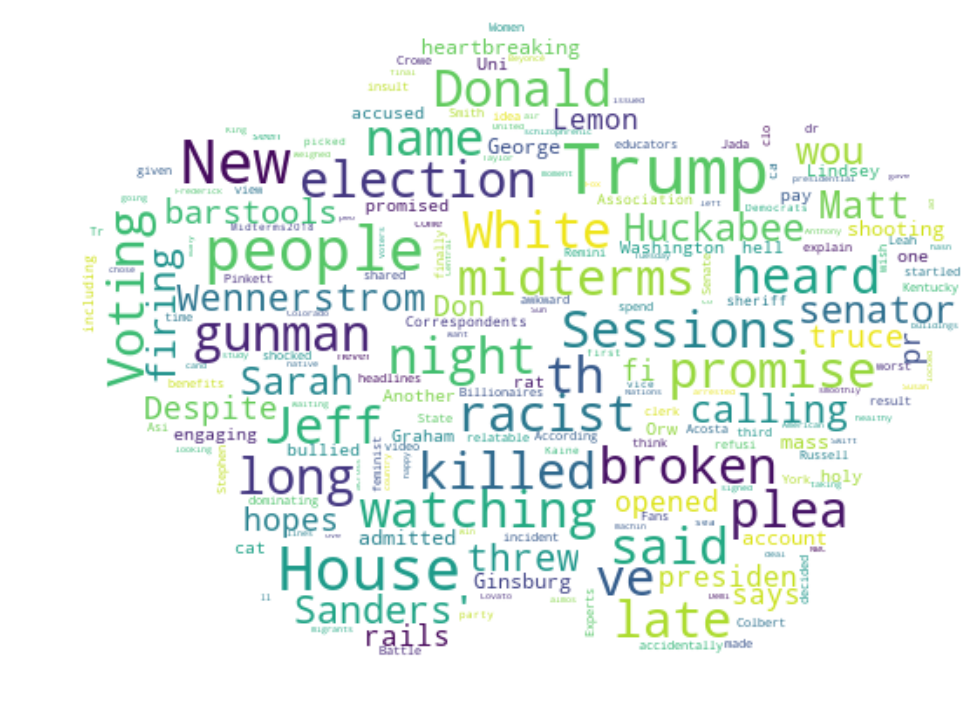

In [28]:
mask_shape = np.array(Image.open("cloud.png"))
stopwords = set(STOPWORDS)
stopwords.add("NULL")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          mask=mask_shape,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['내용']))

plt.figure(figsize=(8,8))
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

![wc](material/download.png)

그중 가장 많이 나온 단어 10개를 뽑아본다.

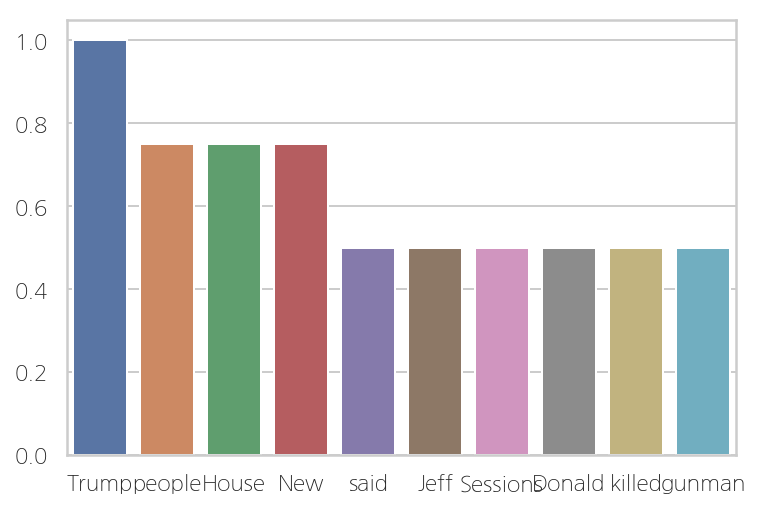

In [32]:
key = []
value = []
for i in wordcloud.words_:
    key.append(i)
    value.append(wordcloud.words_.get(i))
    
sns.barplot(key[:10], value[:10])

11월 6일 미국의 중간선거(상의원,하의원,주지사 선거) 영향으로 관련 단어가 많이 사용됐음을 알 수 있다. (Trump, New, said, Donald)

또한 gunman 과 killed 라는 단어가 사용된 것으로 보아 총기사건이 발생했음을 유추할 수 있다.

[美 11·6 중간선거 실시 "트럼프 국정운영 분수령"](http://news.hankyung.com/article/2018110637687)

[[속보] 미국 LA 교외 술집서 총기난사](http://news.kbs.co.kr/news/view.do?ncd=4069668&ref=A)

### 5. 감정 표현에 따른 regression

좋아요를 제외한 반응을 사용한다

#### 5-1. 댓글

In [29]:
from sklearn.linear_model import LinearRegression
emoji = df[['화나요','웃겨요','멋져요','슬퍼요','최고예요']].astype(int)
target_reply = df['댓글'].astype(int)
emoji = sm.add_constant(emoji)
model = sm.OLS(target_reply, emoji)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     댓글   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     22.92
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           3.93e-17
Time:                        01:40:37   Log-Likelihood:                -1337.4
No. Observations:                 159   AIC:                             2687.
Df Residuals:                     153   BIC:                             2705.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.2065    101.009      1.249      0.2

위의 결과에서 보이듯이 화나요의 갯수가 댓글수에 가장 큰 영향을 미쳤으며 그다음 웃겨요가 영향을 미쳤다. 

나머지 멋져요, 슬퍼요, 최고에요는 통계적으로 유의미한 결과가 있다고 할 수 없다.

#### 5-2. 공유

In [30]:
target_share = df['공유'].astype(int)
model2 = sm.OLS(target_share, emoji)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                     공유   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     259.0
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           9.44e-73
Time:                        01:40:40   Log-Likelihood:                -1377.5
No. Observations:                 159   AIC:                             2767.
Df Residuals:                     153   BIC:                             2785.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -294.0937    129.984     -2.263      0.0

위의 결과에서 보이듯이 최고예요가 공유에 가장 큰 영향을 미쳤다. 

유의수준을 5%로 잡았을때 최고예요, 화나요, 웃겨요 순으로 공유수에 영향을 미쳤다.

수정결정계수가 0.894로 이 모델의 설명력이 더 높다

### 6. error case

In [ ]:
dates_list = []
contents_list = []
comments_list = []
emotions_list = []
df = pd.DataFrame(columns=["날짜", "내용", "댓글", "공유", "좋아요", "화나요", "웃겨요", "멋져요", "슬퍼요", "최고예요"])

# 페이스북은 밑으로 내려야만 그 다음 게시물이 뜨기 때문에 초기에 입력한 날짜가 끝날 때까지 밑으로 내려가는 코드
while True:
    try: 
        driver.find_element_by_css_selector("#www_pages_reaction_see_more_unitwww_pages_posts").click()
        dates = driver.find_elements_by_css_selector("#pagelet_timeline_main_column ._4-u2._4-u8 ._4-u2._4-u8 ._5pcq abbr")
        date = dates[-1].get_attribute("title")[:9].replace("-","")
        if int(date) < int(first_date):
            break
    except:
        time.sleep(5)

# 게시물이 올라온 날짜를 크롤링 해서 리스트에 넣는 코드        
dates = driver.find_elements_by_css_selector("#pagelet_timeline_main_column ._4-u2._4-u8 ._4-u2._4-u8 ._5pcq abbr")
for date in dates:
    if int(date.get_attribute("title")[:9].replace("-","")) >= first_date:
        dates_list.append(date.get_attribute('title'))
nums = len(dates_list)

# 게시물에 존재하는 Text
contents = driver.find_elements_by_css_selector("#pagelet_timeline_main_column ._4-u2._4-u8 ._4-u2._4-u8 .userContent")
for content in contents[:nums]:
    k = content.find_elements_by_css_selector('p:first-child')
    if k:
        contents_list.append(k[0].text)
    else:
        contents_list.append('')

# 댓글과 공유 개수    
comments = driver.find_elements_by_css_selector("#pagelet_timeline_main_column ._4-u2._4-u8 ._4-u2._4-u8 ._ipn.clearfix._-5d ._ipo a")
for comment in comments[:nums*2]:
    comments_list.append(comment.text)

![facebookerr2](material/errorcase2.png)

![facebookerr1](material/errorcase1.png)

감사합니다